In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2809,2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2810,2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2811,2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
2812,2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_57986/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2014-09-17,0.004144
1,2014-09-18,0.003655
2,2014-09-19,0.003216
3,2014-09-20,0.003425
4,2014-09-21,0.003275
...,...,...
2809,2022-05-27,0.422170
2810,2022-05-28,0.424949
2811,2022-05-29,0.434314
2812,2022-05-30,0.468154


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((2754, 60, 1), (2754, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(2754, 60, 1)

In [12]:
X[0], y[0]

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.00293862]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 149ms/step


(array([[0.00347761]], dtype=float32), array([0.00311297]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[412.455]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[387.88198853]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

87/87 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1), (2754, 1))

In [22]:
y.shape

(2754, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2014-11-16,387.881989,412.455048,521.534485,404.230164,448.887665,389.383545,391.194611,371.270203,415.146088,309.818176,253.911194,583.972961,366.514465
2014-11-17,387.407990,424.161255,508.612885,407.522461,449.423279,398.033966,401.816772,383.025024,401.956055,305.086548,265.599243,594.134277,378.424042
2014-11-18,375.197998,423.689270,504.217773,409.854767,450.435211,398.888153,401.687256,382.550049,398.587769,303.015930,265.028229,593.671875,377.505341
2014-11-19,380.554993,411.524261,505.201965,410.190582,442.378387,387.542664,389.570984,370.335327,399.390320,297.256012,252.575653,581.372559,365.102844
2014-11-20,357.839996,416.861145,502.323029,404.030640,443.614014,391.068817,394.084930,375.693573,396.027130,296.497864,257.869141,585.858154,370.573059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,28627.574219,27219.017578,28967.291016,27325.560547,29238.259766,29416.806641,29453.896484,23055.556641,27596.230469,26157.095703,29506.400391,29514.171875,29338.375000
2022-05-28,28814.900391,26668.937500,28665.521484,27272.929688,28612.156250,28699.722656,28784.824219,22772.441406,27336.033203,25954.015625,28844.253906,28866.146484,28670.367188
2022-05-29,29445.957031,26829.970703,28391.587891,27190.240234,28670.128906,29065.369141,29093.441406,22855.339844,27061.203125,25852.259766,29107.666016,29152.113281,28950.933594


# LSTM Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

In [26]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2014-11-16,0.003113,0.003183,0.003069,0.003171,0.002979,0.003110,0.003040,0.004971,0.003310,0.003637,0.003100,0.003090,0.003037
2014-11-17,0.003106,0.003376,0.002873,0.003228,0.002987,0.003243,0.003199,0.005266,0.003091,0.003541,0.003279,0.003245,0.003216
2014-11-18,0.002925,0.003368,0.002806,0.003269,0.003003,0.003256,0.003197,0.005254,0.003036,0.003499,0.003270,0.003238,0.003202
2014-11-19,0.003004,0.003168,0.002821,0.003274,0.002879,0.003082,0.003016,0.004947,0.003049,0.003383,0.003080,0.003050,0.003016
2014-11-20,0.002667,0.003256,0.002777,0.003168,0.002898,0.003136,0.003083,0.005082,0.002993,0.003367,0.003161,0.003119,0.003098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.422170,0.443820,0.434264,0.469382,0.444202,0.449252,0.437104,0.574111,0.453512,0.527020,0.449060,0.444592,0.438257
2022-05-28,0.424949,0.434778,0.429690,0.468470,0.434606,0.438231,0.427112,0.567008,0.449202,0.522908,0.438965,0.434702,0.428222
2022-05-29,0.434314,0.437425,0.425537,0.467038,0.435495,0.443851,0.431721,0.569088,0.444650,0.520847,0.442981,0.439066,0.432437


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((2203, 12), (2203,), (275, 12), (275,), (276, 12), (276,))

In [29]:
meta_training_X

,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,
2014-11-16,0.003183,0.003069,0.003171,0.002979,0.003110,0.003040,0.004971,0.003310,0.003637,0.003100,0.003090,0.003037
2014-11-17,0.003376,0.002873,0.003228,0.002987,0.003243,0.003199,0.005266,0.003091,0.003541,0.003279,0.003245,0.003216
2014-11-18,0.003368,0.002806,0.003269,0.003003,0.003256,0.003197,0.005254,0.003036,0.003499,0.003270,0.003238,0.003202
2014-11-19,0.003168,0.002821,0.003274,0.002879,0.003082,0.003016,0.004947,0.003049,0.003383,0.003080,0.003050,0.003016
2014-11-20,0.003256,0.002777,0.003168,0.002898,0.003136,0.003083,0.005082,0.002993,0.003367,0.003161,0.003119,0.003098
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22,0.294929,0.271660,0.295226,0.285137,0.289330,0.280371,0.447880,0.293640,0.371345,0.287158,0.285996,0.280480
2020-11-23,0.291151,0.275153,0.300519,0.281489,0.284389,0.276398,0.442452,0.297156,0.370414,0.282799,0.281374,0.276254
2020-11-24,0.291070,0.273910,0.304090,0.279959,0.284559,0.276768,0.442335,0.295778,0.368887,0.283009,0.281700,0.276487


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 12, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 12, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 12, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((2203, 12, 1), (275, 12, 1), (276, 12, 1))

In [31]:
meta_training_X[0]

array([[0.00318332],
       [0.00306856],
       [0.00317118],
       [0.00297889],
       [0.00310995],
       [0.00304032],
       [0.0049708 ],
       [0.00330996],
       [0.0036369 ],
       [0.00310044],
       [0.0030899 ],
       [0.00303674]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((2203, 1), (275, 1), (276, 1))

In [33]:
meta_training_y[0]

array([0.00311297])

In [34]:
meta_model = Sequential()
meta_model.add(InputLayer(input_shape = (12, 1)))
meta_model.add(LSTM(32))
meta_model.add(Dense(1, activation = 'linear'))

meta_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cp = ModelCheckpoint('models/meta_model.h5', save_best_only = True)
meta_model.compile(optimizer = Adam(learning_rate = 0.001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [36]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 300, validation_data = (meta_validation_X, meta_validation_y), callbacks = [cp], batch_size = 256)

Epoch 1/300
9/9 [==============================] - 1s 29ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - mean_absolute_error: 0.0480 - val_loss: 0.1184 - val_root_mean_squared_error: 0.3441 - val_mean_absolute_error: 0.3245
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0364 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2466 - val_mean_absolute_error: 0.2317
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 7.4612e-04 - root_mean_squared_error: 0.0273 - mean_absolute_error: 0.0234 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1839 - val_mean_absolute_error: 0.1744
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 2.2137e-04 - root_mean_squared_error: 0.0149 - mean_absolute_error: 0.0115 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mean_absolute_error: 0.0259
Epoch 5/300
1/9 [==>...........................] - ETA: 0s 

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 6ms/step - loss: 6.4555e-05 - root_mean_squared_error: 0.0080 - mean_absolute_error: 0.0060 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0730 - val_mean_absolute_error: 0.0615
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 6.2836e-05 - root_mean_squared_error: 0.0079 - mean_absolute_error: 0.0067 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mean_absolute_error: 0.0551
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 3.1960e-05 - root_mean_squared_error: 0.0057 - mean_absolute_error: 0.0032 - val_loss: 9.4720e-04 - val_root_mean_squared_error: 0.0308 - val_mean_absolute_error: 0.0231
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 2.6032e-05 - root_mean_squared_error: 0.0051 - mean_absolute_error: 0.0033 - val_loss: 8.3613e-04 - val_root_mean_squared_error: 0.0289 - val_mean_absolute_error: 0.0215
Epoch 9/300
9/9 [==============================] - 0s 6m

In [37]:
meta_model = load_model('models/meta_model.h5')

In [38]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

9/9 [==============================] - 0s 905us/step


,Actual,Predicted
0,0.721957,0.724029
1,0.695619,0.725768
2,0.697277,0.702737
3,0.722212,0.704813
4,0.729345,0.723683
...,...,...
271,0.422170,0.436093
272,0.424949,0.428081
273,0.434314,0.429756
274,0.468154,0.436610


In [39]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [40]:
test_results

,Actual,Predicted
0,48223.785299,48361.753906
1,46470.545415,48477.488281
2,46580.888617,46944.351562
3,48240.771269,47082.550781
4,48715.614386,48338.718750
...,...,...
271,28267.478611,29194.349609
272,28452.524193,28660.960938
273,29075.898074,28772.458984
274,31328.568671,29228.738281


In [41]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [42]:
test_results

,Actual,Predicted
2021-08-29,48223.785299,48361.753906
2021-08-30,46470.545415,48477.488281
2021-08-31,46580.888617,46944.351562
2021-09-01,48240.771269,47082.550781
2021-09-02,48715.614386,48338.718750
...,...,...
2022-05-27,28267.478611,29194.349609
2022-05-28,28452.524193,28660.960938
2022-05-29,29075.898074,28772.458984
2022-05-30,31328.568671,29228.738281


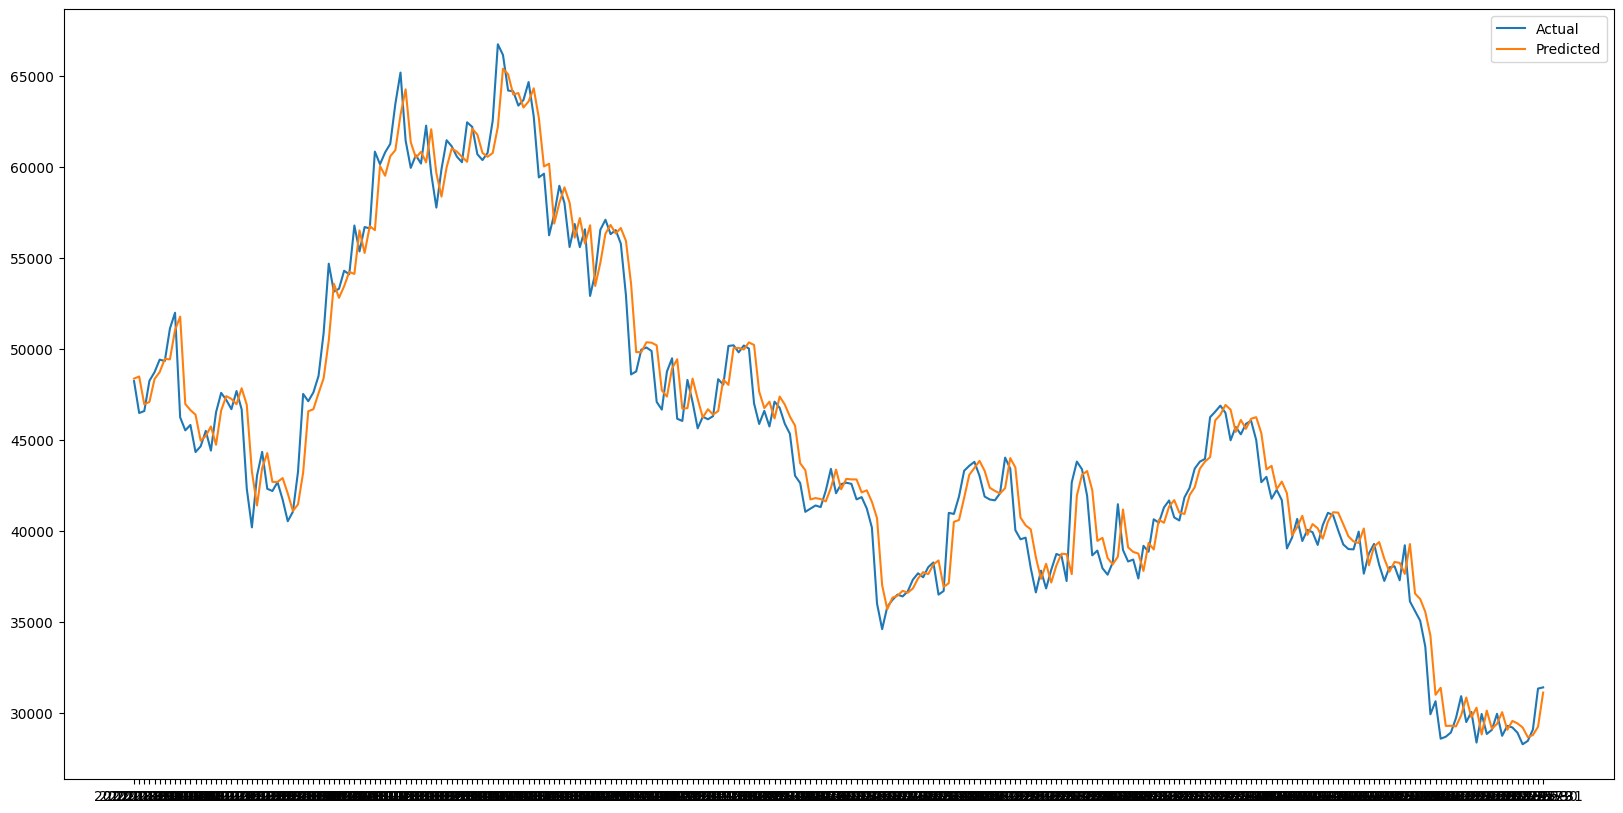

In [43]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [44]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 1590.1364354250625, MAE: 1159.3651321946857
